In [265]:
# Lg cari permasalahan bisnis ny dmn?

# Best Seller item? [V]

# Visualize Payment Method and Order Status Frequency [V]

# NaN / Duplicate perlu diclean? (V)

# Data Cleaning jgn lbh dr Seminggu, supaya ada waktu utk Analisis

#### Product Performance: Best-Selling Products [V]###


**Background**  

"A PKSTN company engaged in the data sector, wants to recruit *Data Scientist*. This company conducts analysis of E-Commerce performance in Pakistan"

## Problem Statement

Companies want to know **Analysis of E-Commerce Performance in Pakistan**. This information will help companies to determine strategic business optimization decisions.

As a *Data Analyst*, we will try to answer the following questions:

** How is Product Performance from E-commerce Pakistan from 2016 - 2018?**



# Data

To answer the questions above, we will analyze participant data that has been collected by the company. The dataset can be accessed [here](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset).

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [267]:
pd.set_option('display.max_columns', None)

In [268]:
df=pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [269]:
df['Year'].value_counts()

2017.0    290920
2018.0    159695
2016.0    133909
Name: Year, dtype: int64

In [270]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

# This is the largest retail e-commerce orders dataset from Pakistan. It contains half a million transaction records from March 2016 to August 2018. The columns contains:

1. item_id : Typically used by an e-commerce platform to identify a product within its own database
2. status : Order Status
3. created_at : Date of Transaction
4. sku : Typically used by a manufacturer or seller to identify a product within their own inventory.
5. price : Price of the item
6. qty_ordered : Shows how many order of the item
7. grand_total : Final amount that the customer is expected to pay
8. increment_id : Unique and sequential identifier assigned to an order when it is created, it is used to track and manage orders within the system
9. category_name_1 : Label or title given to a specific category of products within an e-commerce platform or inventory management system, it is used to identify and describe the category and it is visible to the customers, it allows them to easily understand what the category is about.
10. sales_comission_code : unique identifier used to track and manage sales commissions within an e-commerce platform or inventory management system. 
11. discount_amount : Monetary value of a discount applied to a purchase or sale, it is the difference between the original price of a product or service and the final price after the discount has been applied.
12. payment_method : Various ways in which a customer can pay for a product or service.
13. Working Date : Specific date that is used as a reference point for financial, accounting, or business-related transactions.
14. BI Status : Current state or condition of a business intelligence system or project, it can include information about the progress, performance, and overall health of the system or project, it is important to track the performance and progress of a BI system or project, it can be used to identify and address any issues and to ensure that the system or project is meeting its objectives.
15. MV : "Missing Value", which refers to a data point that is not present or is not available for a certain variable in a dataset. 
16. Year : Shows the year of the order
17. Month : Shows the month of the order
18. Customer Since : Shows how long the customer been shopping with our E-Commerce
19. M-Y : "Month-Year" represent the date by only month and year, not including the day.
20. FY : Fiscal year is a period of twelve consecutive months used for accounting and budgeting purposes.
21. Customer ID : Shows the ID of E-commerce Customer

## Data Understanding and Cleaning

Before getting into the analysis, we need to get to know our dataset further in the *Data Understanding* stage. From this process, we will know what anomalies are in our dataset and need to be handled in the *Data Cleaning* stage. 

Every anomaly handling that is carried out will be accompanied by a justification for the steps taken, both in *domain knowledge* and statistically.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [272]:
df.isna().sum()

item_id                  464051 
status                   464066 
created_at               464051 
sku                      464071 
price                    464051 
qty_ordered              464051 
grand_total              464051 
increment_id             464051 
category_name_1          464215 
sales_commission_code    601226 
discount_amount          464051 
payment_method           464051 
Working Date             464051 
BI Status                464051 
 MV                      464051 
Year                     464051 
Month                    464051 
Customer Since           464062 
M-Y                      464051 
FY                       464051 
Customer ID              464062 
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [273]:
df['sales_commission_code'].fillna('No Commission', inplace=True)

In [274]:
df = df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
df = df.dropna(axis=0, how= 'all')
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
df.isna().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    0     
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

In [277]:
df_max_qty = df.groupby('Month').sum()['qty_ordered'].sort_values(ascending=False)
df_max_qty

Month
11.0    168872.0
3.0     109640.0
5.0     81569.0 
8.0     62877.0 
6.0     51319.0 
2.0     50544.0 
4.0     50043.0 
7.0     47768.0 
12.0    39573.0 
10.0    36552.0 
1.0     31880.0 
9.0     27133.0 
Name: qty_ordered, dtype: float64

In [278]:
df_mth_order = df.groupby('Month').sum()['qty_ordered'].sort_values(ascending=False)
df_mth_order = df_mth_order.to_frame().reset_index()
df_mth_order

,Month,qty_ordered
0,11.0,168872.0
1,3.0,109640.0
2,5.0,81569.0
3,8.0,62877.0
4,6.0,51319.0
5,2.0,50544.0
6,4.0,50043.0
7,7.0,47768.0
8,12.0,39573.0
9,10.0,36552.0


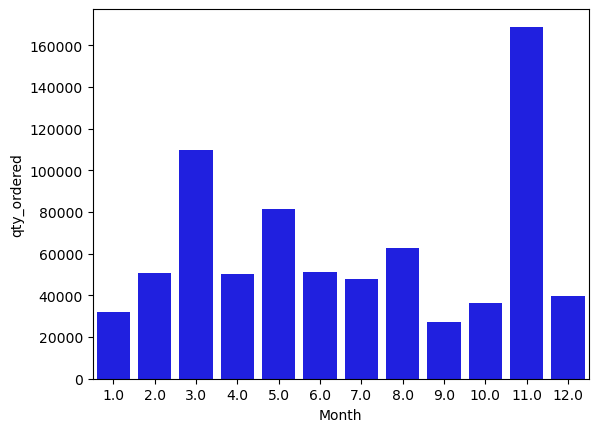

In [313]:
sns.barplot(data=df_mth_order, x='Month', y='qty_ordered', color='blue');


In [280]:
print(f'Total Rows and Columns in dataset df {df.shape}')
df.info()

Total Rows and Columns in dataset df (1048575, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   item_id                584524 non-null   float64
 1   status                 584509 non-null   object 
 2   created_at             584524 non-null   object 
 3   sku                    584504 non-null   object 
 4   price                  584524 non-null   float64
 5   qty_ordered            584524 non-null   float64
 6   grand_total            584524 non-null   float64
 7   increment_id           584524 non-null   object 
 8   category_name_1        584360 non-null   object 
 9   sales_commission_code  1048575 non-null  object 
 10  discount_amount        584524 non-null   float64
 11  payment_method         584524 non-null   object 
 12  Working Date           584524 non-null   object 
 13  BI Status            

In [281]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,1048575,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7227,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,No Commission,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,601226,271960,15169,234178,9516,82714,83928,306883


In [282]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

In general, we can see that:

* Pakistan Largest Ecommerce Dataset have 26 Columns and 1.048.575 Rows
* Some Columns, such as 'gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', and 'last_new_job' have Empty Data. Empty Data on each and every Columns represent with NaN Data.
* `enrollee_id` column contains a unique id for each participant, so it is irrelevant in the analysis and can simply be deleted.
* `experience` column has data type object. From the description, this column should contain numeric data. Let's check in more detail.
* `training_hours` column has a fairly large data range, from 1-336. Assuming the training is done full time - 8 hours a day, then it takes 42 days to reach 336 days. This figure is still quite reasonable, so nothing needs to be done with this column.
* There was a typo in the `company_size` field. The 10/49 should be 10-49.
* Some Ordinal Categorical Data, a new column can be created based on the ranking of the category to facilitate analysis (optional)

In [283]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 10 Best Seller Item ##

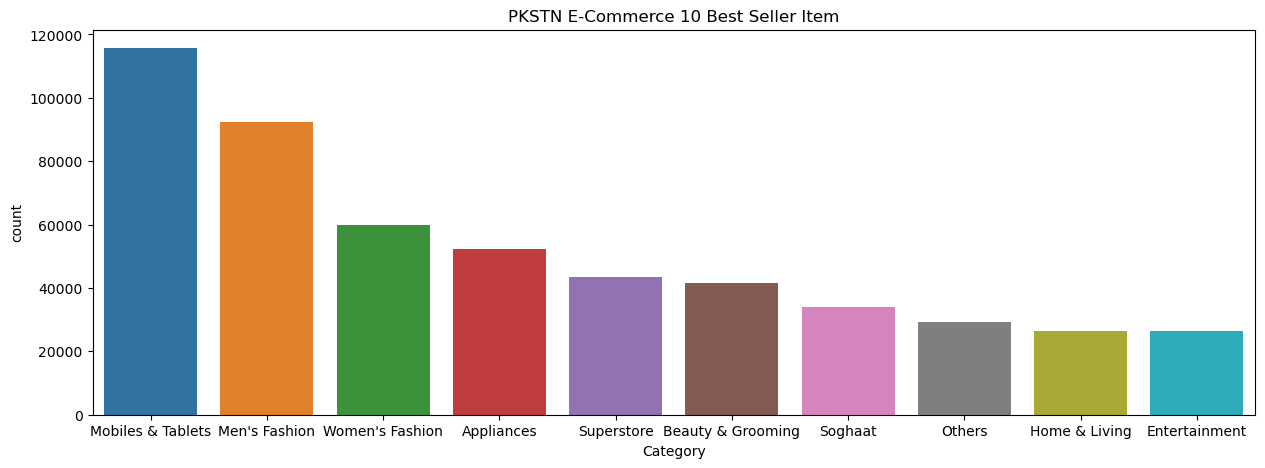

In [284]:
plt.figure(figsize=(15,5))
graph=sns.barplot(x='category_name',y='count',data=Bestseller10)
graph.set_title('PKSTN E-Commerce 10 Best Seller Item')
plt.xlabel('Category')
plt.show()

### ORDER STATUS FREQ ###

In [285]:
orderstatusfreq = df.groupby('status')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(orderstatusfreq)

            status   count
4   complete        233685
1   canceled        201249
14  received        77290 
8   order_refunded  59529 
15  refund          8050  
3   cod             2859  
9   paid            1159  
2   closed          494   
10  payment_review  57    
11  pending         48    
13  processing      33    
7   holded          31    
6   fraud           10    
12  pending_paypal  7     
0   \N              4     
5   exchange        4     


In [286]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [287]:
# df[df['sales_commission_code']=='\\N'].replace('\\N','Other')

In [288]:
# Merubah N jadi Others di kolom Category
kolom = ['status', 'created_at', 'sku', 'increment_id', 'category_name_1', 'sales_commission_code','payment_method', 'Working Date', 'BI Status', 'Customer Since', 'M-Y', 'FY', 'Customer ID']
kolom

for i in kolom:
    df[kolom] = np.where(df[kolom] == '\\N', 'Others', df[kolom])

In [289]:

# kolom = ['status', 'created_at', 'sku', 'increment_id', 'category_name','payment_method', 'Working Date', 'BI Status', 'Customer Since', 'M-Y', 'FY', 'Customer ID']
# kolom

# for i in kolom:
#     print((df[kolom]=='\\N').value_counts().sum())

**Top 10 Payment Method**

In [290]:
paymethod=df.groupby('payment_method')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
print(paymethod)

     payment_method   count
6   cod              271960
2   Payaxis          97641 
0   Easypay          82900 
12  jazzwallet       35145 
8   easypay_voucher  31176 
4   bankalfalah      23065 
11  jazzvoucher      15633 
1   Easypay_MA       14028 
7   customercredit   7555  
3   apg              1758  


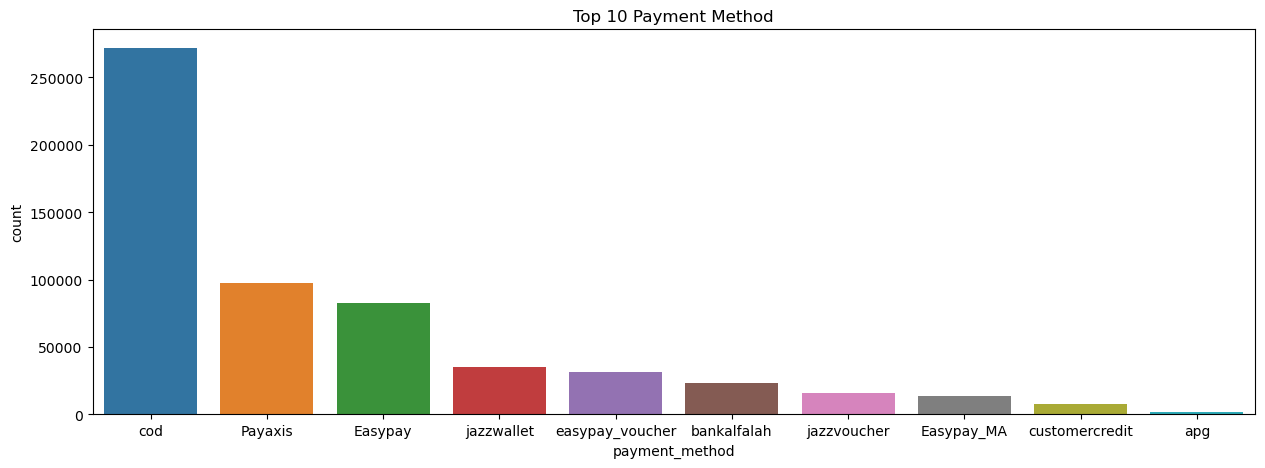

In [291]:
plt.figure(figsize=(15,5))
graph=sns.barplot(x='payment_method',y='count',data=paymethod)
graph.set_title('Top 10 Payment Method')
plt.show()

In [292]:
# Create the Feature and Target Var
X = df[['payment_method']] # Feature Var
y = df[['status']] # Target Var

In [293]:
# Convert payment_method to numerical values
X['payment_method'] = pd.Categorical(X['payment_method'])
X['payment_method'] = X['payment_method'].cat.codes

In [294]:
# Create the Linear Regression Model
reg = LinearRegression()

**ORDER STATUS**

In [295]:
orderstatus=df.groupby('status')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(orderstatus)

            status   count
4   complete        233685
1   canceled        201249
14  received        77290 
8   order_refunded  59529 
15  refund          8050  
3   cod             2859  
9   paid            1159  
2   closed          494   
10  payment_review  57    
11  pending         48    
13  processing      33    
7   holded          31    
6   fraud           10    
12  pending_paypal  7     
0   Others          4     
5   exchange        4     


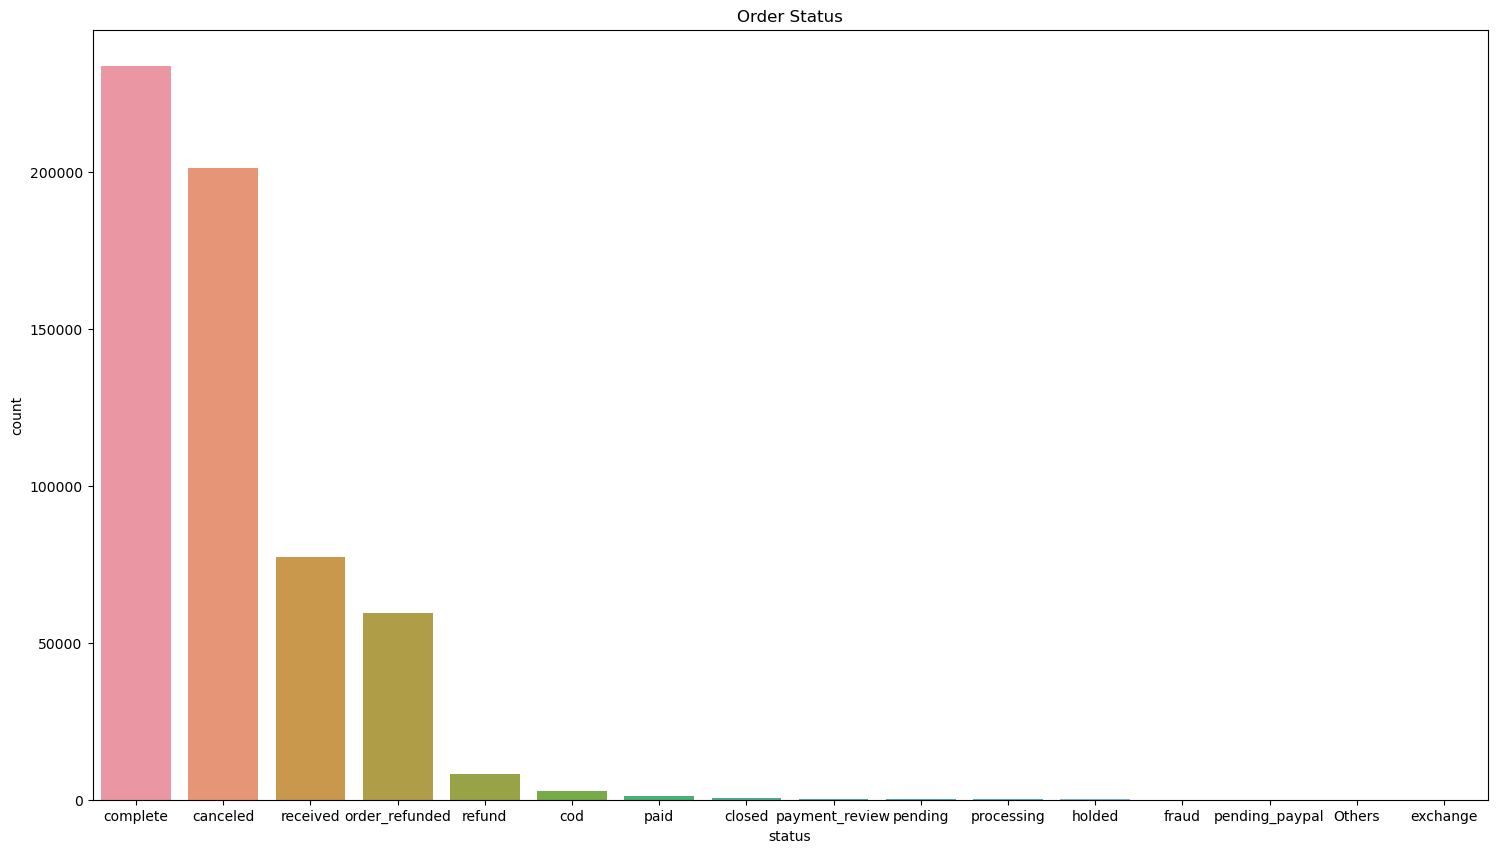

In [296]:
plt.figure(figsize=(18,10))
graph=sns.barplot(x='status',y='count',data=orderstatus)
graph.set_title('Order Status')
plt.show()

In [297]:
df.rename(columns={' MV ':'MV'},inplace=True)

In [298]:
df.isna().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    0     
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
MV                       464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

In [299]:
data = df.dropna()

In [300]:
data.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
MV                       0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

**Fixing Payment Method**

In [301]:
data['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [302]:
payment_to_replace = {'cashatdoorstep': 'cod', 'Easypay_MA':'Easypay', 'easypay_voucher':'Easypay',
                      'jazzvoucher':'jazzwallet','internetbanking':'Payaxis','mygateway':'Payaxis',
                      'marketingexpense':'Payaxis'} 
data = data.replace({"payment_method": payment_to_replace})

**Eliminating Anomaly Values** 

In [303]:
data.drop(data[(data['status']=='\\N')].index,inplace=True)

In [304]:
data.drop(data[(data['category_name_1']=='\\N')].index,inplace=True)

In [305]:
data.drop(data[(data['BI Status']=='#REF!')].index,inplace=True)

In [306]:
data.drop(data[(data['sales_commission_code']=='\\N')].index,inplace=True)

In [307]:
df[df['sales_commission_code'].isna() == True]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID


In [308]:
kategori_barang=data['category_name_1'].value_counts().values
jumlah=data['category_name_1'].value_counts().index

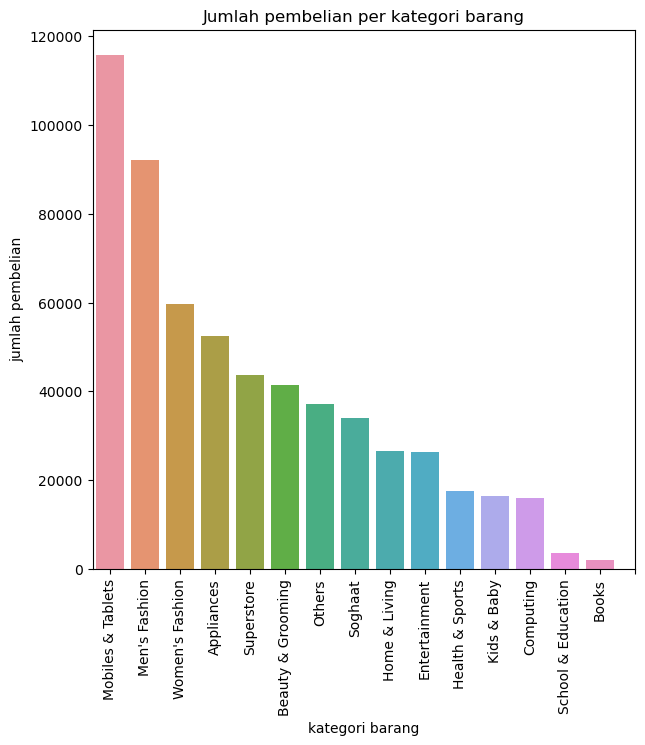

In [309]:
# plt.figure(figsize=(7,7))
# sns.barplot(x=jumlah, y=kategori_barang, data=data)
# plt.title('Jumlah pembelian per kategori barang')
# plt.xticks(np.arange(16), rotation=90)
# plt.xlabel('kategori barang')
# plt.ylabel('jumlah pembelian')
# plt.show()

In [332]:
df_cpy = df.groupby('Year').count()[['Customer ID']].reset_index()

Text(0.5, 1.0, 'Customer Per Year')

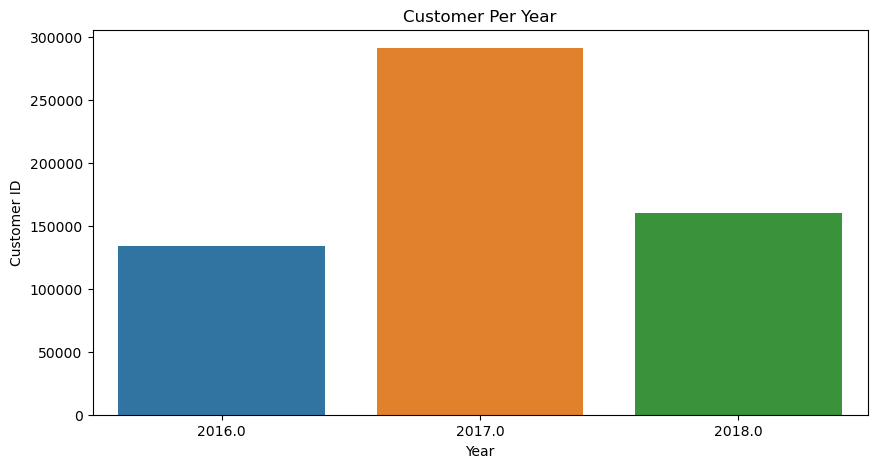

In [336]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_cpy, x='Year', y='Customer ID')
plt.title('Customer Per Year')

In [311]:
data.isna().sum()


item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
MV                       0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

In [312]:
data.to_csv('CAPSTONE_PROJECT_M2.csv', index=False)